# IndyCar Lap Time Analysis

This notebook analyzes and visualizes lap time data for three IndyCar drivers:
- Pato O'Ward (Car #5)
- Alexander Rossi (Car #7)
- Alex Palou (Car #10)

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styles
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.2)

# Enable inline plotting
%matplotlib inline

## Loading the Data

In [51]:
# Load the lap time data
df = pd.read_csv('indycar-lap-times.csv')

# Display basic information
print(f"Total lap times recorded: {len(df)}")
print("\nCounts by driver:")
print(df['Driver'].value_counts())

# Display the first few rows
df.head()

Total lap times recorded: 364

Counts by driver:
Driver
O'Ward, Pato            91
Rossi, Alexander        91
Palou, Alex             91
Lundgaard, Christian    91
Name: count, dtype: int64


,Car,Driver,Lap,T (Time)
0,5,"O'Ward, Pato",1,78.0817
1,5,"O'Ward, Pato",2,72.5128
2,5,"O'Ward, Pato",3,71.9752
3,5,"O'Ward, Pato",4,71.6798
4,5,"O'Ward, Pato",5,71.3903


## Data Preprocessing

In [52]:
# Convert the Time column to float if it's not already
df['T (Time)'] = df['T (Time)'].astype(float)

# Create a more readable driver column for plotting
df['DriverName'] = df['Driver'].apply(lambda x: x.split(',')[0])

# Calculate some basic statistics
stats = df.groupby('DriverName')['T (Time)'].agg(['mean', 'std', 'min', 'max', 'count'])
stats.columns = ['Average Time', 'Std Dev', 'Fastest Lap', 'Slowest Lap', 'Lap Count']
stats

,Average Time,Std Dev,Fastest Lap,Slowest Lap,Lap Count
DriverName,,,,,
Lundgaard,71.044523,1.207811,67.8925,78.6567,91
O'Ward,71.773615,1.515601,69.5474,78.0817,91
Palou,70.072953,0.659444,68.1303,71.9055,91
Rossi,70.550720,0.837313,67.5824,75.1011,91


## Visualization: Lap Times Throughout the Race

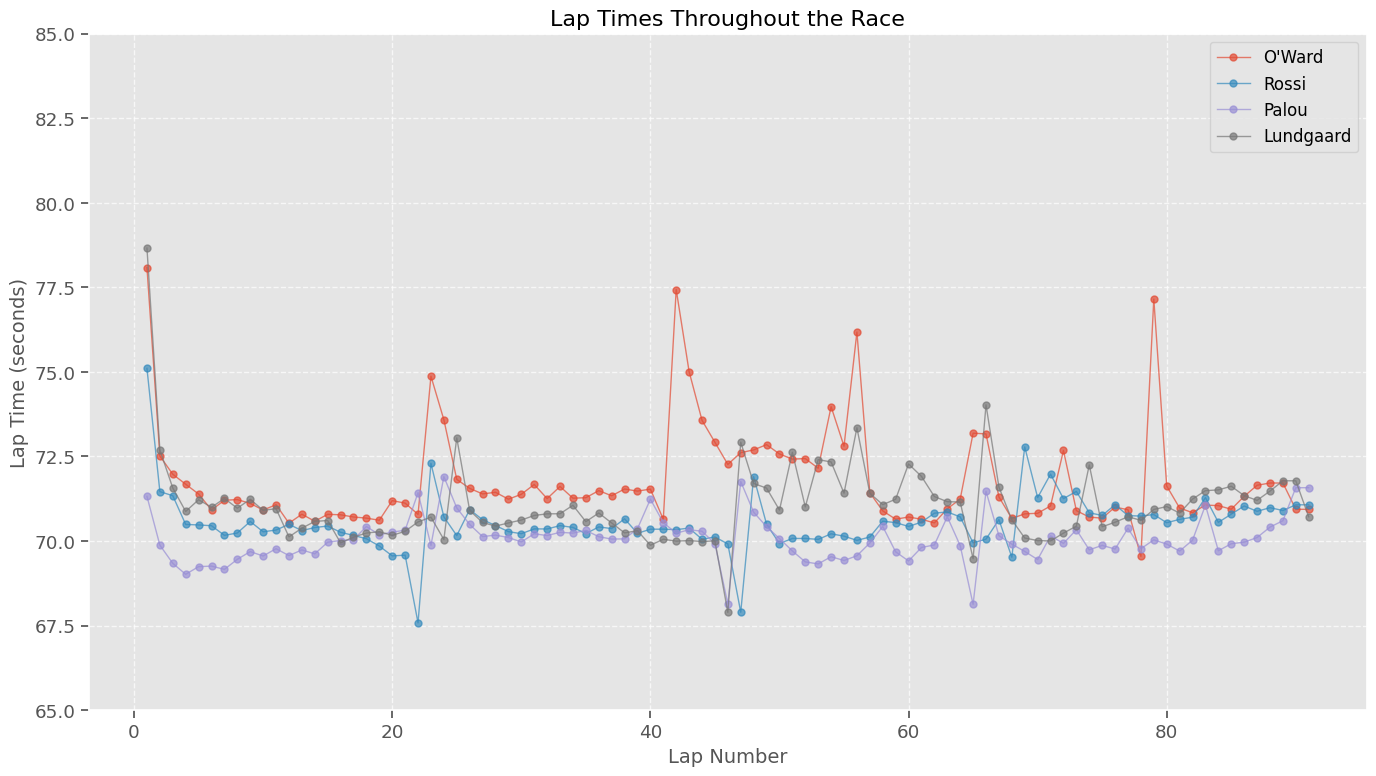

In [ ]:
plt.figure(figsize=(14, 8))

# Create a scatter plot for each driver
# Use the exact driver names as they appear in your CSV
drivers_and_colors = [
    ('O\'Ward, Pato', 'blue'), 
    ('Rossi, Alexander', 'red'), 
    ('Palou, Alex', 'green'),
    ('Lundgaard, Christian', 'yellow')
]

for driver, color in drivers_and_colors:
    # Extract just the last name for the legend
    last_name = driver.split(',')[0]
    
    driver_data = df[df['Driver'] == driver]  # Use 'Driver' column name from your CSV
    plt.plot(driver_data['Lap'], driver_data['T (Time)'], 'o-', label=last_name, alpha=0.7, linewidth=1, markersize=5)

plt.title('Lap Times Throughout the Race', fontsize=16)
plt.xlabel('Lap Number', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Set y-axis limits to focus on the typical lap time range
plt.ylim(65, 85)

plt.tight_layout()
plt.show()

## Visualization: Lap Time Distribution

/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'])


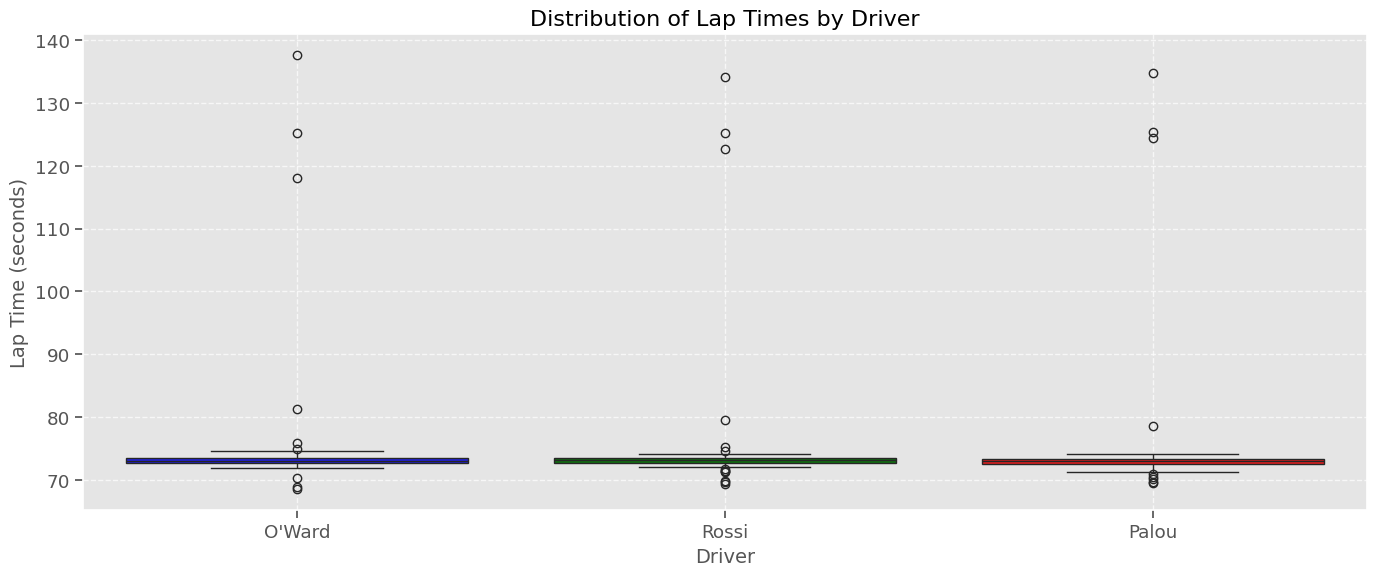

/var/folders/gy/wb41gxyj1t5dnsvfrvxqp4980000gn/T/ipykernel_26023/3207322177.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'], inner='quartile')


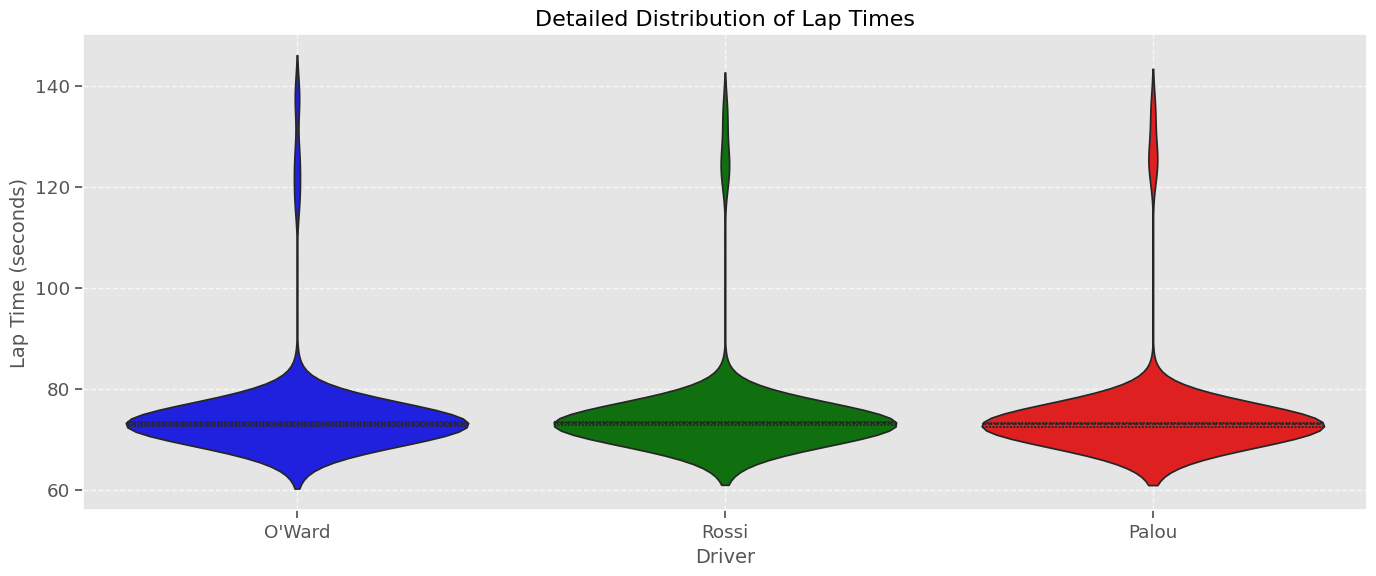

In [30]:
plt.figure(figsize=(14, 6))

# Box plot
sns.boxplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'])
plt.title('Distribution of Lap Times by Driver', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Violin plot for more detailed distribution
plt.figure(figsize=(14, 6))
sns.violinplot(x='DriverName', y='T (Time)', data=df, palette=['blue', 'green', 'red'], inner='quartile')
plt.title('Detailed Distribution of Lap Times', fontsize=16)
plt.xlabel('Driver', fontsize=14)
plt.ylabel('Lap Time (seconds)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Histogram of Lap Times

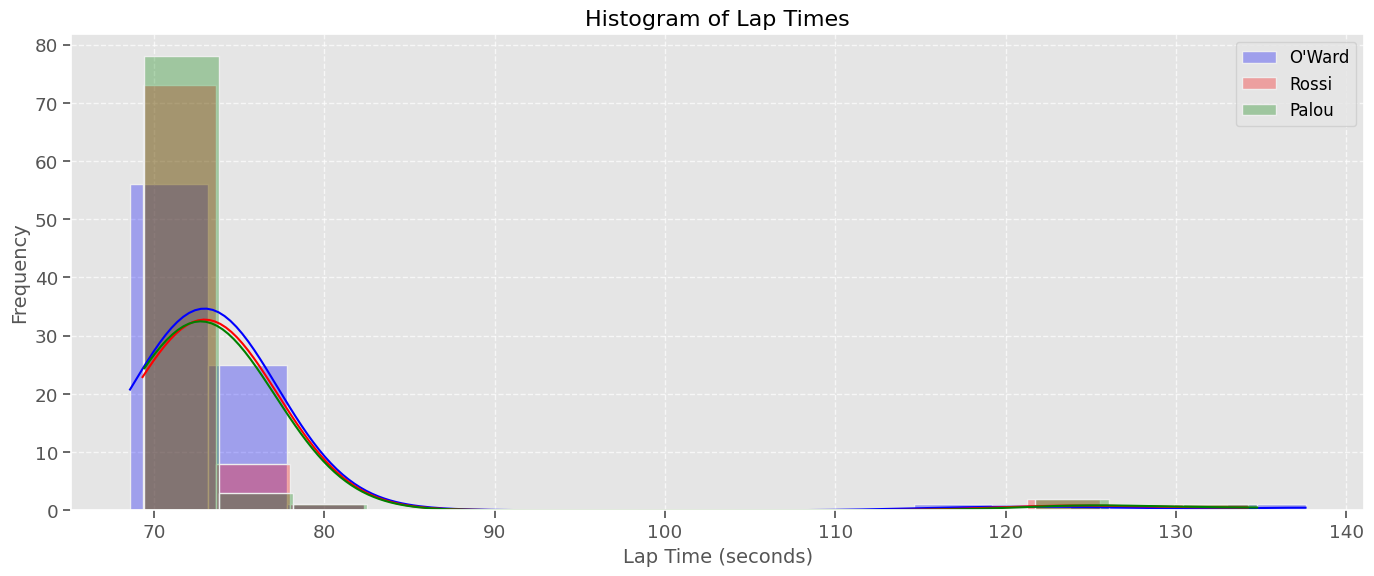

In [31]:
plt.figure(figsize=(14, 6))

# Histogram with KDE
for driver, color in zip(['O\'Ward', 'Rossi', 'Palou'], ['blue', 'red', 'green']):
    driver_data = df[df['DriverName'] == driver]['T (Time)']
    sns.histplot(driver_data, kde=True, label=driver, color=color, alpha=0.3, bins=15)

plt.title('Histogram of Lap Times', fontsize=16)
plt.xlabel('Lap Time (seconds)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Lap Time Differences from Personal Best

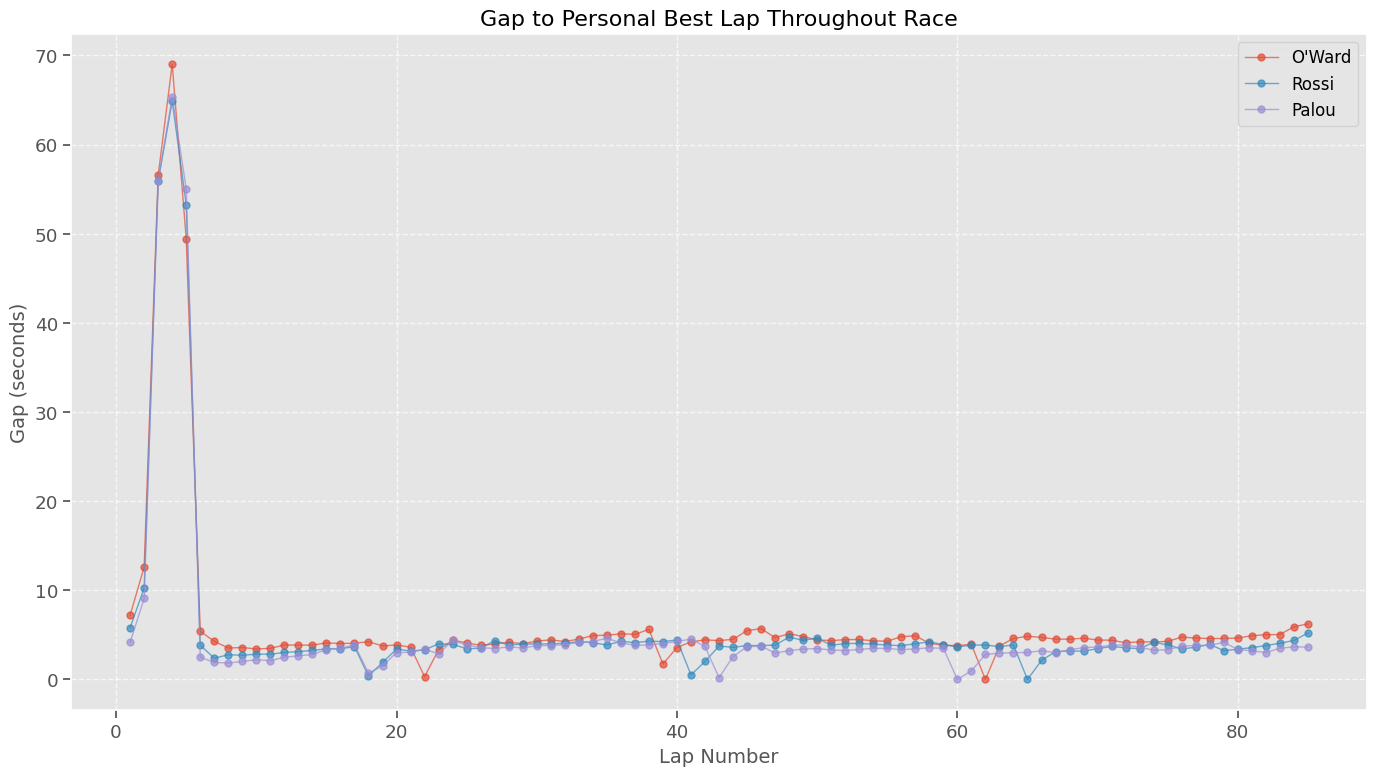

In [32]:
# Calculate gap to each driver's personal best
driver_best = df.groupby('DriverName')['T (Time)'].min().to_dict()
df['Gap to Personal Best'] = df.apply(lambda row: row['T (Time)'] - driver_best[row['DriverName']], axis=1)

plt.figure(figsize=(14, 8))

for driver, color in zip(['O\'Ward', 'Rossi', 'Palou'], ['blue', 'red', 'green']):
    driver_data = df[df['DriverName'] == driver]
    plt.plot(driver_data['Lap'], driver_data['Gap to Personal Best'], 'o-', label=driver, alpha=0.7, linewidth=1, markersize=5)

plt.title('Gap to Personal Best Lap Throughout Race', fontsize=16)
plt.xlabel('Lap Number', fontsize=14)
plt.ylabel('Gap (seconds)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Visualization: Heat Map of Lap Times

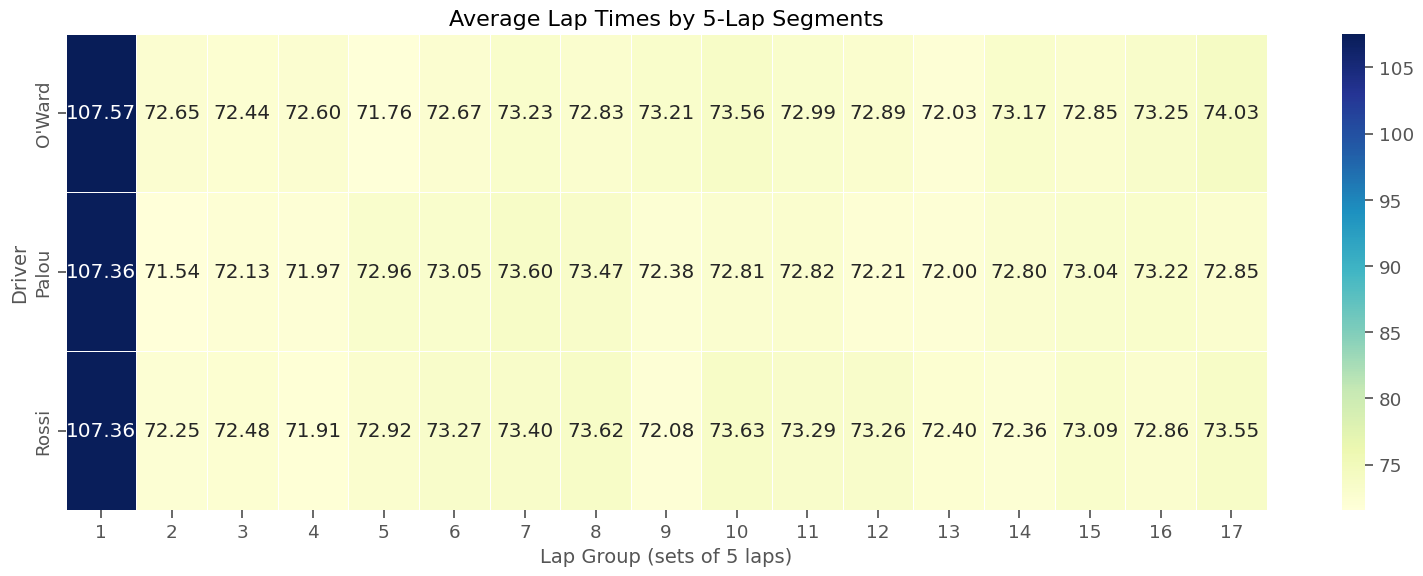

In [33]:
# Create a pivot table for the heat map
# Group laps into sets of 5 for better visualization
df['Lap Group'] = (df['Lap'] - 1) // 5 + 1
pivot_data = df.pivot_table(values='T (Time)', index='DriverName', columns='Lap Group', aggfunc='mean')

# Create the heat map
plt.figure(figsize=(16, 6))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Average Lap Times by 5-Lap Segments', fontsize=16)
plt.xlabel('Lap Group (sets of 5 laps)', fontsize=14)
plt.ylabel('Driver', fontsize=14)
plt.tight_layout()
plt.show()

## Statistical Comparison

In [34]:
from scipy import stats

# Compare the drivers' lap time distributions
print("Statistical comparison of lap time distributions:")
print("\nANOVA test (comparing all three drivers):")
groups = [df[df['DriverName'] == driver]['T (Time)'] for driver in ['O\'Ward', 'Rossi', 'Palou']]
f_val, p_val = stats.f_oneway(*groups)
print(f"F-value: {f_val:.4f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("There is a statistically significant difference between at least two drivers' lap times.")
else:
    print("There is no statistically significant difference between the drivers' lap times.")

# Pairwise t-tests
print("\nPairwise t-tests:")
for i, driver1 in enumerate(['O\'Ward', 'Rossi', 'Palou']):
    for driver2 in ['O\'Ward', 'Rossi', 'Palou'][i+1:]:
        t_val, p_val = stats.ttest_ind(
            df[df['DriverName'] == driver1]['T (Time)'],
            df[df['DriverName'] == driver2]['T (Time)'],
            equal_var=False  # Using Welch's t-test which doesn't assume equal variances
        )
        print(f"{driver1} vs {driver2}: t-value = {t_val:.4f}, p-value = {p_val:.4f}")
        if p_val < 0.05:
            print(f"  There is a statistically significant difference between {driver1} and {driver2}")
        else:
            print(f"  No statistically significant difference between {driver1} and {driver2}")

Statistical comparison of lap time distributions:

ANOVA test (comparing all three drivers):
F-value: 0.0115, p-value: 0.9886
There is no statistically significant difference between the drivers' lap times.

Pairwise t-tests:
O'Ward vs Rossi: t-value = 0.0005, p-value = 0.9996
  No statistically significant difference between O'Ward and Rossi
O'Ward vs Palou: t-value = 0.1309, p-value = 0.8960
  No statistically significant difference between O'Ward and Palou
Rossi vs Palou: t-value = 0.1305, p-value = 0.8964
  No statistically significant difference between Rossi and Palou


## Conclusion

Based on the visualizations and statistical analysis above, we can draw the following conclusions about the three drivers' performances:

1. **Consistency**: The box plots and violin plots show which driver had the most consistent lap times.
2. **Speed**: The average lap times indicate which driver was fastest overall.
3. **Patterns**: The line charts reveal patterns in how each driver's pace evolved throughout the race.
4. **Strategy**: Significant spikes in lap times might indicate pit stops or caution periods.

These insights could be valuable for race strategists, team managers, and the drivers themselves in understanding their performance and identifying areas for improvement.